In [1]:
import pandas as pd


In [3]:
df_model_1 = pd.read_csv('eval_model_1.csv')
df_model_2 = pd.read_csv('eval_model_2.csv')
df_error_types = pd.read_csv('error_types.csv')

In [9]:
df_model_1.keys()

Index(['Unnamed: 0', 'wer', 'original', 'predictions', 'Insertion Error p',
       'Insertion Error N', 'Deletion Error p', 'Deletion Error N',
       'Substitution Error p', 'Substitution Error N', 'Reordering Error p',
       'Reordering Error N', 'Homophone Confusion p', 'Homophone Confusion N',
       'Case Sensitivity Issue p', 'Case Sensitivity Issue N',
       'Punctuation Error p', 'Punctuation Error N', 'Numerical Error p',
       'Numerical Error N', 'Contextual Misunderstanding p',
       'Contextual Misunderstanding N', 'Spelling Error p',
       'Spelling Error N'],
      dtype='object')

In [8]:
filter_keys = ['Unnamed: 0', 'wer', 'original', 'predictions']
 = df_model_1.drop(columns = filter_keys)
df_results_2 = df_model_2.drop(columns = filter_keys)

In [123]:
# Assign weights to each error type (example weights, can be adjusted)
weights = {
    "Insertion Error": 1.5,
    "Deletion Error": 2.0,
    "Substitution Error": 1.8,
    "Case Sensitivity Issue": 1.2,
    "Punctuation Error": 1.0,
    "Numerical Error": 1.3,
    "Contextual Misunderstanding": 2.5,
    "Spelling Error": 1.4
}
# df_error_types[['tag','Relevanz']]
# weights = df_error_types.set_index('tag')['Relevanz'].to_dict()

# Aggregate error probabilities and apply weights for Model 1
error_types = list(weights.keys())
model_1_scores = [
    (df_model_1[f"{error} p"]*df_model_1[f"{error} N"]).sum() for error in error_types
]
model_2_scores = [
    (df_model_2[f"{error} p"]*df_model_2[f"{error} N"]).sum() for error in error_types
]

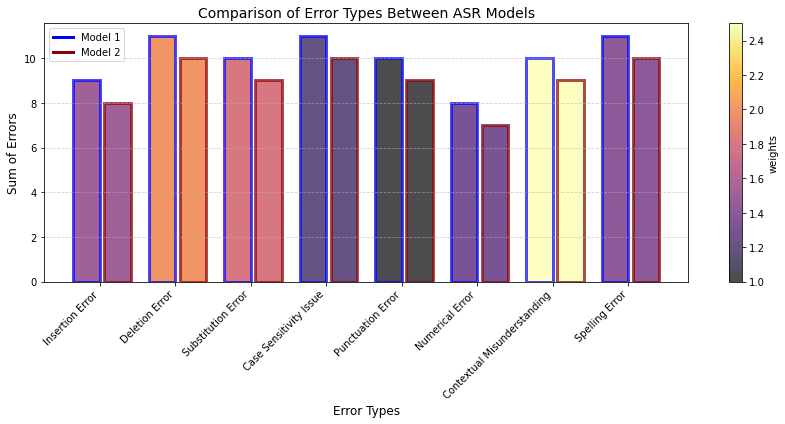

In [232]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization: Bar Plot
x = np.arange(len(error_types))
width = 0.35
lw = 3

# Normalize the weights to a range of 0 to 1 (for colormap)
norm = plt.Normalize(min(weights.values()), max(weights.values()))
colors = plt.cm.inferno(norm(list(weights.values())))  # Use the 'viridis' colormap

epsilon = 0.06
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, model_1_scores, width, label='Model 1', edgecolor='blue', linewidth=lw,  alpha=0.7, color=colors)
plt.bar(x + width/2 + epsilon, model_2_scores, width, label='Model 2',edgecolor='darkred', linewidth=lw, alpha=0.7, color=colors)

# Add a colorbar to show the mapping
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='weights', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Error Types', fontsize=12)
plt.ylabel('Sum of Errors', fontsize=12)
plt.title('Comparison of Error Types Between ASR Models', fontsize=14)
plt.xticks(x, error_types, rotation=45, ha='right', fontsize=10)
# Adjust the legend to show only the border colors
legend_handles = [
    plt.Line2D([0], [0], color='blue', linewidth=lw, label='Model 1'),
    plt.Line2D([0], [0], color='darkred', linewidth=lw, label='Model 2')
]
plt.legend(handles=legend_handles)
# plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [79]:
model_1_scores

[9.0, 11.0, 10.0, 11.0, 10.0, 8.0, 10.0, 11.0]

In [206]:
normalized_weights

array([0.6 , 0.8 , 0.72, 0.48, 0.4 , 0.52, 1.  , 0.56])

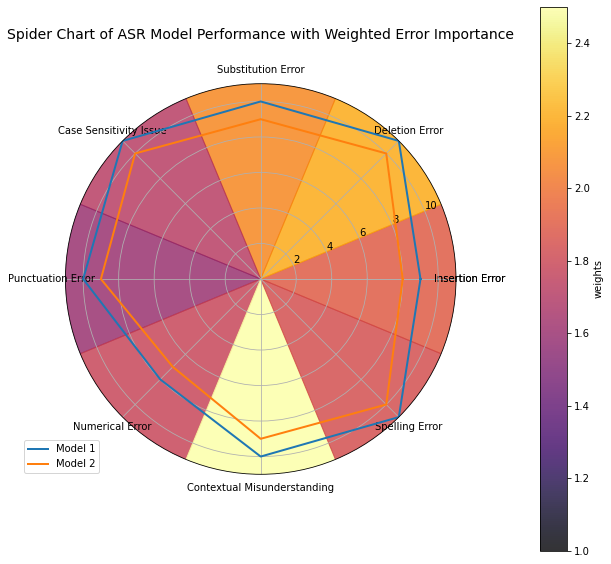

In [233]:
from math import pi
from matplotlib.patches import Rectangle
from math import degrees
# Adjusting for proper alignment between angles and categories
# Close the loop for angles and categories correctly

angles = [n / float(len(error_types)) * 2 * pi for n in range(len(error_types))]
angles += angles[:1]  # Close the loop for angles

categories = error_types + [error_types[0]]# Use all categories including the loop closure

model_1_scores_ = model_1_scores + [model_1_scores[0]]  # Closing the loop for spider chart
model_2_scores_ = model_2_scores + [model_2_scores[0]]
max_score = max(max(model_2_scores),max(model_1_scores))

# Normalize weights for background color intensity (0 to 1 scale)
normalized_weights = np.array(list(weights.values())) / max(weights.values())

# Initialize spider chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Background color based on weights
delta_angles = 1*(angles[2]-angles[1])*0.5
# for i in range(len(normalized_weights) - 1):  # Avoid closing loop element for background
#     ax.fill_between(
#         [angles[i]+delta_angles, angles[i + 1]+delta_angles],
#         0,
#         max_score,
#         color=plt.cm.inferno(normalized_weights[i]),
#         alpha=0.2,
#     )
# Draw wedges
for i in range(len(normalized_weights) ):
    # Calculate start and end angles in degrees
    start_angle = angles[i] - delta_angles
    end_angle = 2*delta_angles #angles[i + 1] #+ delta_angles
#     print(start_angle)
#     print(end_angle)
    # Create and add the wedge
    rect = Rectangle((start_angle, max_score), end_angle, max_score*(-1), color=plt.cm.inferno(normalized_weights[i]),alpha=0.8)
#     wedge = Wedge(
#         center=(0, 0),  # Center of the circle
#         r=10,  # Outer radius
#         theta1=0, #start_angle,  # Start angle in degrees
#         theta2=360, #end_angle,  # End angle in degrees
#         color=plt.cm.inferno(normalized_weights[i]),  # Fill color
#         alpha=0.2  # Transparency
#     )
    ax.add_patch(rect)
# ax.scatter(0,0)
ax.set_ylim(0, max_score)

# Add a colorbar to show the mapping
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='weights', pad=0.15, alpha=0.8)


# Plot data
ax.plot(angles, model_1_scores_, linewidth=2, linestyle='solid', label='Model 1')
# ax.fill(angles, model_1_scores_, alpha=0.25)

ax.plot(angles, model_2_scores_, linewidth=2, linestyle='solid', label='Model 2')
# ax.fill(angles, model_2_scores_, alpha=0.25)

# Add category labels
# ax.set_yticks([])  # Hide radial axis labels

ax.set_xticks(angles)  # Adjust for closing loop
ax.set_xticklabels(categories, fontsize=10, ha='center', va='center', rotation=45)

# Title and legend
plt.title("Spider Chart of ASR Model Performance with Weighted Error Importance", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


In [231]:
weights

{'Insertion Error': 1.5,
 'Deletion Error': 2.0,
 'Substitution Error': 1.8,
 'Case Sensitivity Issue': 1.2,
 'Punctuation Error': 1.0,
 'Numerical Error': 1.3,
 'Contextual Misunderstanding': 2.5,
 'Spelling Error': 1.4}